> INTRODUCTION  

In this model, a prediction model for sales of a software company 1C_Company will done using the given data which contains information about sales from 1st January 2013 to 31st October 2015.

Below is a list of the data contained in this project:

* sales_train.csv: The training set. Daily historical data from January 2013 to October 2015.

* test.csv: The test set. There is need to forecast the sales for these shops and products for November 2015.

* sample_submission.csv: This is a sample submission file shown in the correct format.

* items.csv: Supplemental information about the items/products.

* item_categories.csv: Supplemental information about the items categories.

* shops.csv: Supplemental information about the shops.

There are 6 data sets in this project as shown above. A discription of the fields contained in the data sets is as shown below:

**ID**: An Id that represents a (Shop, Item) tuple within the test set

**shop**_id: Unique identifier of a shop

**item_id**: Unique identifier of a product

**item_category_id**: Unique identifier of item category

**item_cnt_day**: Number of products sold. **You are predicting a monthly amount of this measure**

**item_price**This challenge serves as final project for the "How to win a data science competition" Coursera course.

In this competition you will work with a challenging time-series dataset consisting of daily sales data, kindly provided by one of the largest Russian software firms - 1C Company. 

We are asking you to predict total sales for every product and store in the next month. By solving this competition you will be able to apply and enhance your data science skills.: Ccurrent price of an item

**date**: date in format dd/mm/yyyy

**date_block_num**: A consecutive month number used for convenience. January 2013 is 0, February 2013 is 1 and October 2015 is 33

**item_name**: Name of item

**shop_name**: Name of shop

**item_category_name**: Name of item category


# 1. IMPORT LIBRARY

In [1]:
#Data Handling 
import pandas as pd 
import datetime 
import os 
#visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# 2. LOAD DATA 

In [2]:
#load data
os.listdir('/kaggle/input/') 

sales = pd.read_csv('../input/competitive-data-science-predict-future-sales/sales_train.csv')
item = pd.read_csv('../input/competitive-data-science-predict-future-sales/items.csv')
item_cate = pd.read_csv('../input/competitive-data-science-predict-future-sales/item_categories.csv')
shop = pd.read_csv('../input/competitive-data-science-predict-future-sales/shops.csv')

In [3]:
#number rows and columns each for data. exmp sales_train.csv
print("sales_train : ",sales.shape)
print("item : ", item.shape)
print("item_categories : ", item_cate.shape)
print("shop : ", shop.shape)

sales_train :  (2935849, 6)
item :  (22170, 3)
item_categories :  (84, 2)
shop :  (60, 2)


In [4]:
item_cate.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [5]:
item_cate.tail()

,item_category_name,item_category_id
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82
83,Элементы питания,83


In [6]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [7]:
#JOIN Table 
df = pd.merge(sales, shop, how = 'left', left_on = 'shop_id', right_on = 'shop_id')
df = pd.merge(df, item, how = 'left', left_on = 'item_id', right_on = 'item_id') 
df = pd.merge(df, item_cate, how = 'left', left_on = 'item_category_id', right_on = 'item_category_id')
df.drop(['shop_id','item_id','item_category_id'], axis = 1, inplace = True)
df.head()

,date,date_block_num,item_price,item_cnt_day,shop_name,item_name,item_category_name
0,02.01.2013,0,999.00,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),Кино - Blu-Ray
1,03.01.2013,0,899.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,Музыка - Винил
2,05.01.2013,0,899.00,-1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,Музыка - Винил
3,06.01.2013,0,1709.05,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,Музыка - Винил
4,15.01.2013,0,1099.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),Музыка - CD фирменного производства


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 7 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      int64  
 2   item_price          float64
 3   item_cnt_day        float64
 4   shop_name           object 
 5   item_name           object 
 6   item_category_name  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 179.2+ MB


In [9]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 7 columns):
 #   Column              Dtype         
---  ------              -----         
 0   date                datetime64[ns]
 1   date_block_num      int64         
 2   item_price          float64       
 3   item_cnt_day        float64       
 4   shop_name           object        
 5   item_name           object        
 6   item_category_name  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 179.2+ MB


we changed the date data type of the object to datetime to make it more relevant

In [10]:
df.head()

,date,date_block_num,item_price,item_cnt_day,shop_name,item_name,item_category_name
0,2013-02-01,0,999.00,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),Кино - Blu-Ray
1,2013-03-01,0,899.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,Музыка - Винил
2,2013-05-01,0,899.00,-1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,Музыка - Винил
3,2013-06-01,0,1709.05,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,Музыка - Винил
4,2013-01-15,0,1099.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),Музыка - CD фирменного производства


In [11]:
df.tail()

,date,date_block_num,item_price,item_cnt_day,shop_name,item_name,item_category_name
2935844,2015-10-10,33,299.0,1.0,"Москва ТРК ""Атриум""",V/A Nu Jazz Selection (digipack),Музыка - CD локального производства
2935845,2015-09-10,33,299.0,1.0,"Москва ТРК ""Атриум""",V/A The Golden Jazz Collection 1 2CD,Музыка - CD локального производства
2935846,2015-10-14,33,349.0,1.0,"Москва ТРК ""Атриум""",V/A The Best Of The 3 Tenors,Музыка - CD локального производства
2935847,2015-10-22,33,299.0,1.0,"Москва ТРК ""Атриум""",V/A Relax Collection Planet MP3 (mp3-CD) (jewel),Музыка - MP3
2935848,2015-03-10,33,299.0,1.0,"Москва ТРК ""Атриум""",V/A The Golden Jazz Collection 1 2CD,Музыка - CD локального производства


checking missing values from joining table as df 

In [12]:
print("No. of null values in joining table as df :", df.isnull().sum().sum())

No. of null values in joining table as df : 0


In [13]:
#looking at the number of different catagories

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


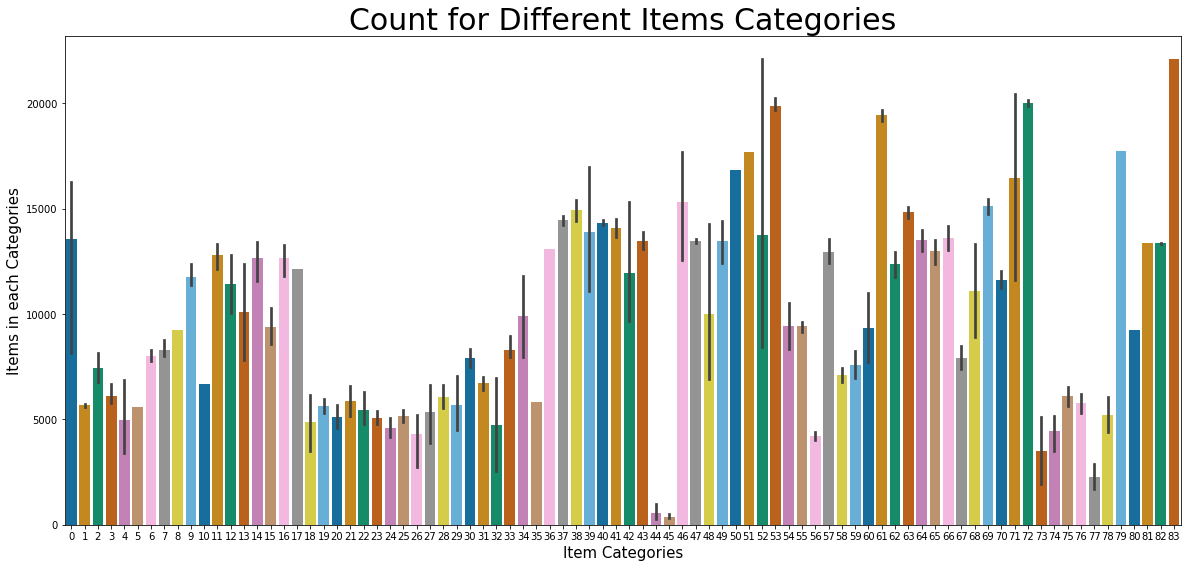

In [14]:
plt.rcParams['figure.figsize'] = (20, 9)
sns.barplot(item['item_category_id'], item['item_id'], palette = 'colorblind')
plt.title('Count for Different Items Categories', fontsize = 30)
plt.xlabel('Item Categories', fontsize = 15)
plt.ylabel('Items in each Categories', fontsize = 15)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


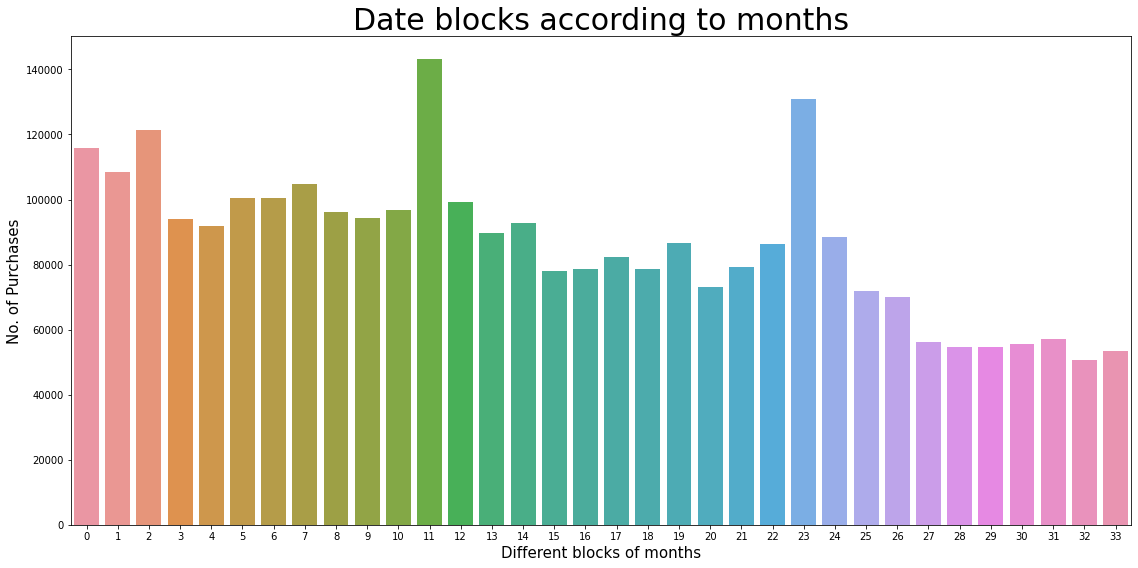

In [15]:
plt.rcParams['figure.figsize'] = (19, 9)
sns.countplot(df['date_block_num'])
plt.title('Date blocks according to months', fontsize = 30)
plt.xlabel('Different blocks of months', fontsize = 15)
plt.ylabel('No. of Purchases', fontsize = 15)
plt.show()

In [16]:
df.describe()

,date_block_num,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,8.908532e+02,1.242641e+00
std,9.422988e+00,1.729800e+03,2.618834e+00
min,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.990000e+02,1.000000e+00
75%,2.300000e+01,9.990000e+02,1.000000e+00
max,3.300000e+01,3.079800e+05,2.169000e+03


date_block_num, item price, and item_cnt_day have a high standard deviation because of the large difference between their minimum and maximum values. This is also the reason why outliers can be seen in item price and item count below.

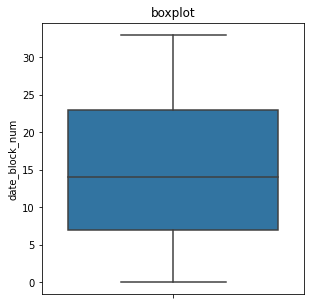

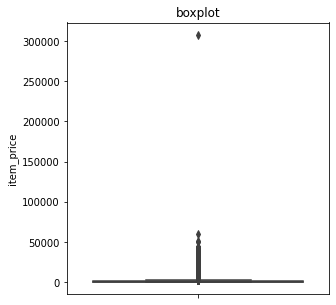

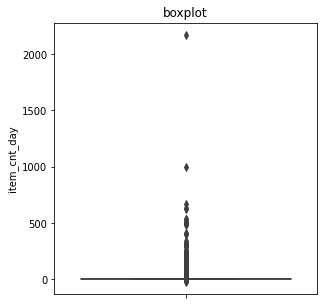

In [17]:
data = df[['date_block_num', 'item_price', 'item_cnt_day']] 
def num_plot(df,var):
    fig = plt.figure(figsize = (16, 5))
    plt.subplot(1,3,3)
    sns.boxplot(y= df[var]) 
    plt.title('boxplot') 
    plt.show()
    


for var in data:
    num_plot(data, var)